In [4]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from pathlib import Path
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [5]:
import sys
sys.path.append('../../../src')
from eda_utils import get_high_freq_columns, get_corr, get_high_corr_columns, missing_values_percentage

In [6]:
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
data_dir = '../data'

In [8]:
df = pd.read_csv(f"{data_dir}/raw/train.csv", index_col='id').convert_dtypes()
display(df.shape)
df.head(2)

(300000, 25)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,0.92,0.68,0.12,0.22,0.28,0.88,0.42,0.74,0.90,0.80,0.72,0.70,0.88,0.72,6.99
2,B,A,A,A,B,B,A,E,A,F,0.44,0.01,0.36,0.85,0.28,0.44,0.35,0.28,0.59,0.55,0.61,0.74,0.33,0.81,8.07


In [9]:
# profile = df.profile_report(
#     title='Train dataset report',
#     correlations={"cramers": {"calculate": False}},
# )
# profile.to_file(output_file="../reports/eda.html")

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Conclusion from report file
- most of the categorical columns are not frequently distributed between the categories

In [10]:
categorical_cols = [col for col in df.columns if col.startswith('cat')]
numeric_cols = [col for col in df.columns if col.startswith('cont')]

In [15]:
threshold = 0.85
display(f"numeric: freq - {get_high_freq_columns(df[numeric_cols], threshold)}")
display(f"categorical: freq - {get_high_freq_columns(df[categorical_cols], threshold)}")
display(f"numeric: corr - {get_high_corr_columns(df[numeric_cols], threshold)}")
display(f"categorical: corr - {get_high_corr_columns(df[categorical_cols], threshold)}")

'numeric: freq - []'

"categorical: freq - ['cat0', 'cat2', 'cat4', 'cat6', 'cat7']"

'numeric: corr - []'

'categorical: corr - []'

In [17]:
for cols, corr in get_corr(df[numeric_cols+['target']]).items():
    if 'target' in cols:
        print(cols, corr)

('cont0', 'target') 0.0
('cont1', 'target') 0.0
('cont2', 'target') 0.0
('cont3', 'target') 0.0
('cont4', 'target') 0.0
('cont5', 'target') 0.0
('cont6', 'target') 0.0
('cont7', 'target') 0.0
('cont8', 'target') 0.0
('cont9', 'target') 0.0
('cont10', 'target') 0.0
('cont11', 'target') 0.0
('cont12', 'target') 0.0
('cont13', 'target') 0.0
('target', 'cont0') 0.03921728362445392
('target', 'cont1') 0.03676730611107812
('target', 'cont2') 0.0018058007525208926
('target', 'cont3') 0.005413858824749366
('target', 'cont4') 0.015907515191581345
('target', 'cont5') 0.025329308999008877
('target', 'cont6') 0.015014906520348913
('target', 'cont7') 0.02347872398140223
('target', 'cont8') 0.019246437965910006
('target', 'cont9') 5.901475375700707e-05
('target', 'cont10') 0.021051184571972945
('target', 'cont11') 0.020685109512945537
('target', 'cont12') 0.0035449705287802892
('target', 'cont13') 0.004974562628172215
('target', 'target') 1.0


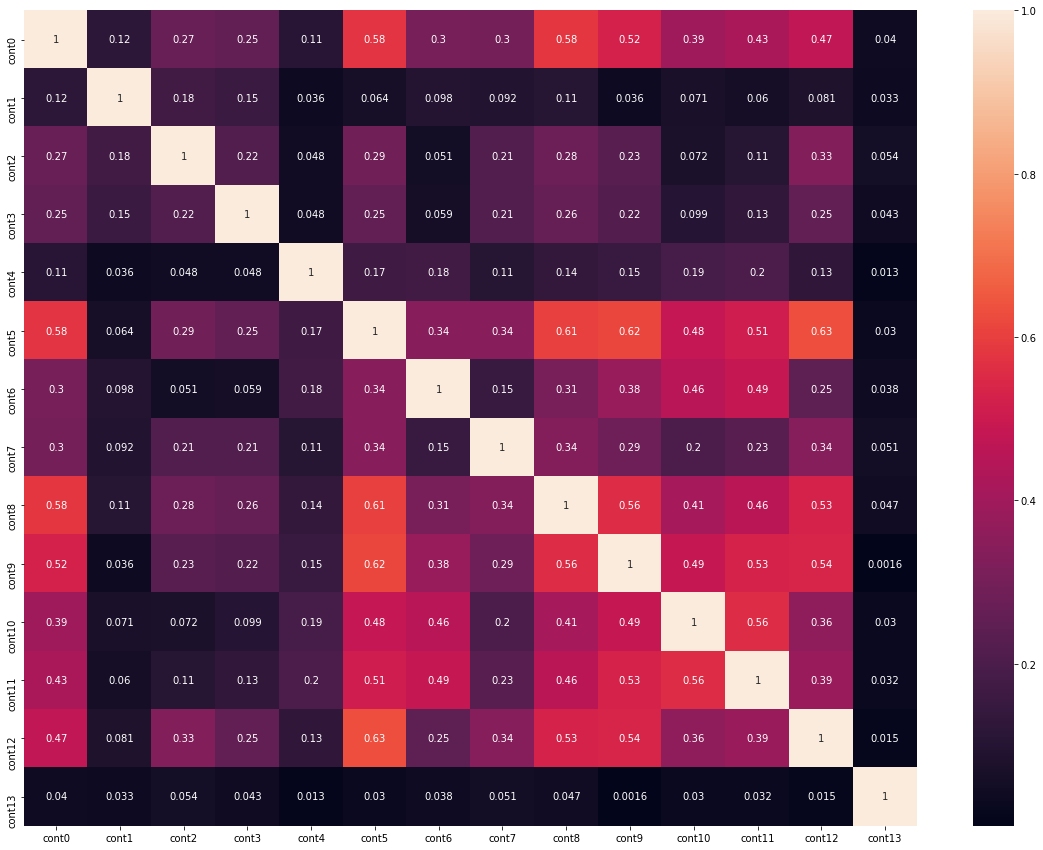

In [18]:
plt.figure(figsize=(20, 15))
sns.heatmap(abs(df[numeric_cols].corr()), annot=True);

### Outliers

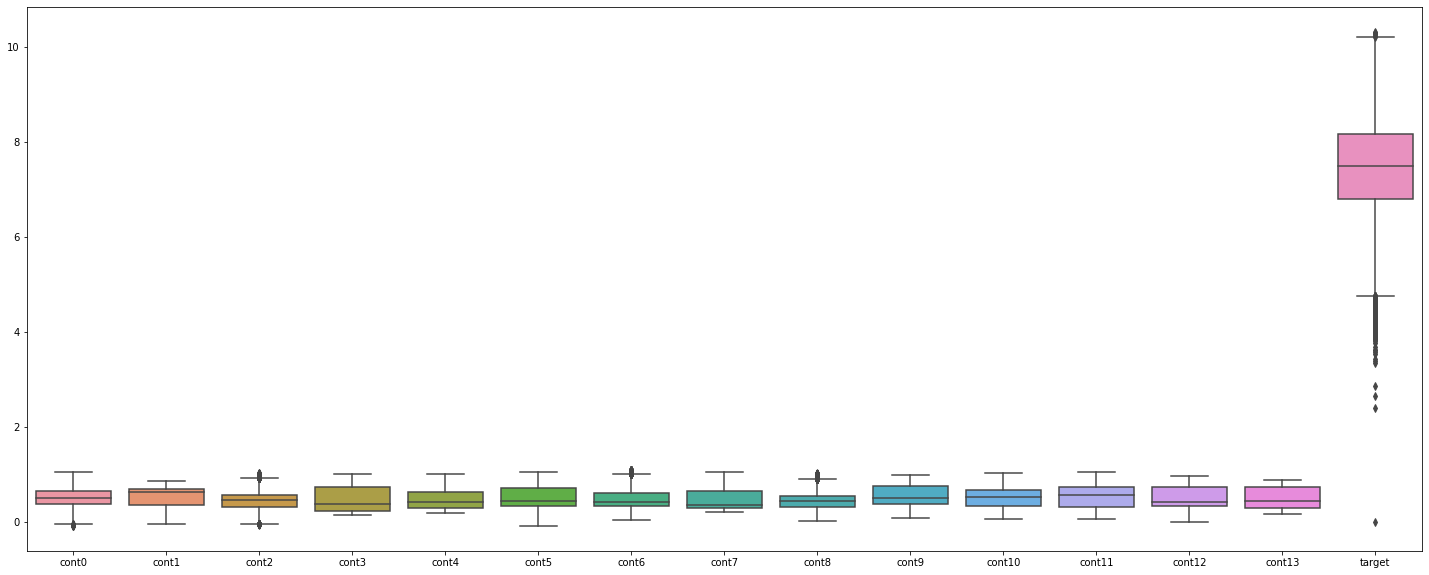

In [28]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df);

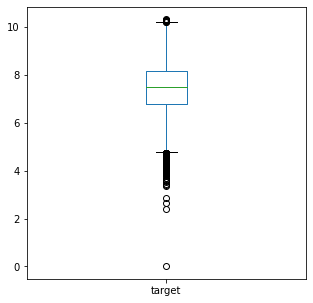

In [29]:
plt.figure(figsize=(5, 5))
df['target'].plot(kind='box');

In [30]:
y_col = 'target'
x_cols = [c for c in df.columns if c != y_col]
cols = 5
rows = math.ceil(len(x_cols)/cols)

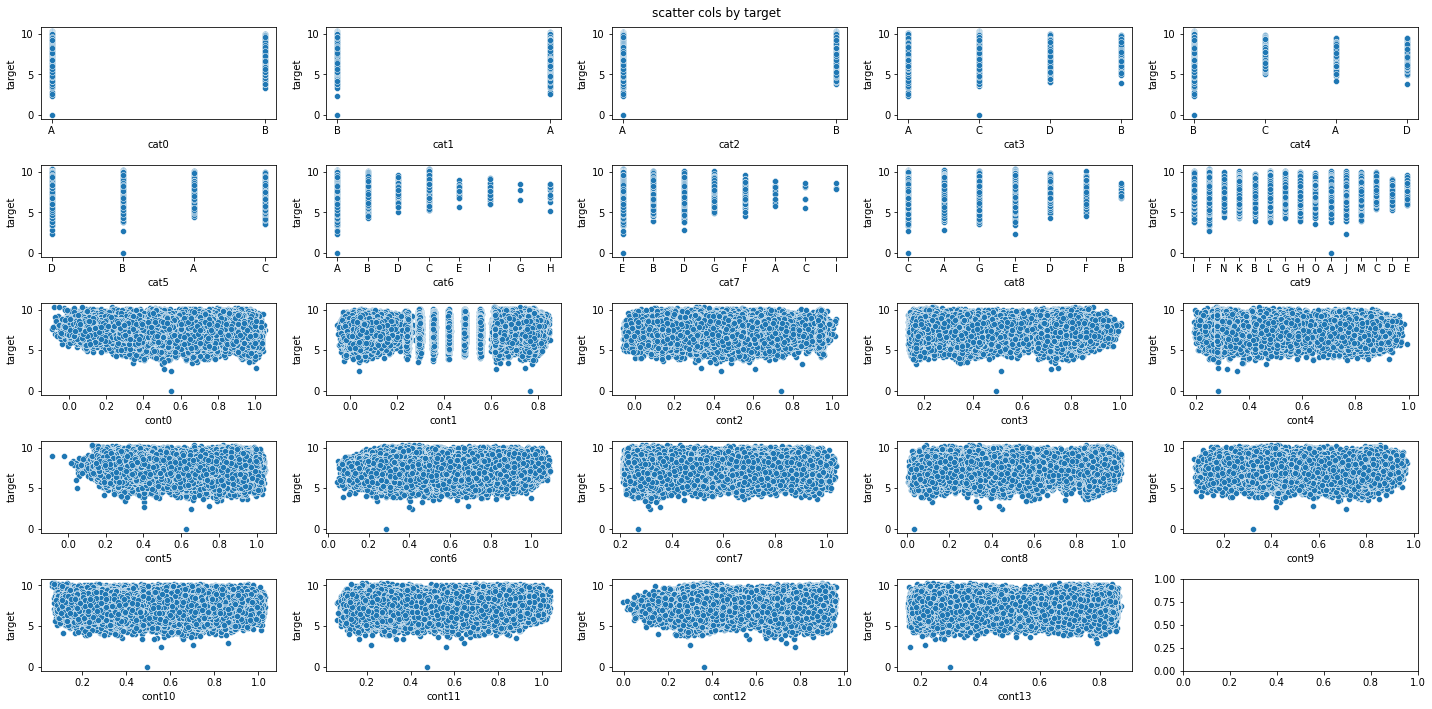

In [31]:
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle('scatter cols by target')
points = [(r, c) for r in range(rows) for c in range(cols)]
for i, point in enumerate(points[:len(x_cols)]):
    sns.scatterplot(ax=axes[point], data=df, y=y_col, x=x_cols[i])
fig.tight_layout()
plt.show()